### Ulises Troncoso

For this project I will be using an article 'Why the Best Boxers Don’t Draw the Biggest Crowds' by Kelefa Sanneh

In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

# Sample text
text = """This past Tuesday, at around 7:30 a.m. in New York, or 4:30 a.m. in California, a small but stubborn faction of the American boxing audience (which is, itself, a small but stubborn faction of the broader sports audience) opened up the ESPN+ app and got ready to watch one of the year’s most eagerly anticipated fights: Stephen Fulton, the top fighter at junior featherweight, which has a limit of a hundred and twenty-two pounds, was facing Naoya Inoue, a Japanese star who was moving up from bantamweight, which has a limit of one-eighteen, and who was considered one of the best and most exciting fighters in any weight division. Fulton comes from Philadelphia, but he doesn’t have much of a home-town fan base, especially compared to Inoue, which explains why the fight was held in front of a sold-out crowd at Ariake Arena, in Tokyo—and which helps explain, too, why the event did not capture the attention of more American fans.

In most sports, there is a reliable correlation between excellence and prominence: you become a star by winning, and winning again. But boxing is not a normal sport: it often functions less as a meritocracy than a marketplace, with the biggest rewards going to whoever can draw the biggest crowds. If you want to be a star, especially in America, a winning record is necessary but not sufficient. And sometimes in boxing the causation works in reverse: the more popular you are, the more power you have to select an opponent whom you think you can beat, or to negotiate home-arena advantage; in that sense, being a star can help you win. In recent years, there has been a growing divergence: the best fighters do not always make the biggest fights. For hard-core fans, this is an extraordinary week, featuring not just Fulton vs. Inoue but also, on Saturday night, the long-hoped-for meeting of Terence Crawford and Errol Spence, Jr., a pair of undefeated virtuosos in the welterweight division (a hundred and forty-seven pounds). “This fight sells itself,” Crawford has said, but although he and Spence are superlative competitors, they are both rather low-key personalities. It’s not clear how many casual sports fans will be willing to pay eighty-five dollars for the pay-per-view broadcast of their fight.

Many of the most popular fights, of course, are the ones that feature big names, even if those names belong to people who are no longer the most skilled fighters, or never were. In 2020, two aging legends, Mike Tyson and Roy Jones, Jr., drew a big audience by clambering back into the ring for a good-natured exhibition match. Floyd Mayweather, Jr., who has been essentially retired since 2015, has come back for some novelty mismatches. (He recently fought John Gotti III, a novice boxer from a famous family.) Jake Paul, a former actor and YouTube star, has become a top boxing attraction by taking the sport seriously, and by leveraging his polarizing reputation; when you buy a Jake Paul fight, part of what you are buying is the chance to see him get punched in the face. (On August 5th, Paul will fight Nate Diaz, a popular mixed-martial-arts veteran who will be making his professional-boxing début.) Influencer boxing is now essentially a sport of its own, thanks largely to an organization called Misfits Boxing, which stages fights between Internet-famous demi-celebrities, promising viewers minimal technical skill and maximal mayhem, and often delivering on both counts. One recent Misfits fight was cancelled after a press conference during which one competitor assailed his opponent, who is Muslim, with “sausages that were believed to be pork meat,” according to a termination letter apparently sent by the organization to the sausage-thrower; another, a tag-team match, was upstaged when the members of the winning team turned on each other and brawled after the final bell.

In theory, the best fights might draw the biggest crowds, and generate the biggest paydays, leaving fans happy and fighters rich. But, in practice, things are more complicated. Tyson Fury has a better claim than anyone on being the heavyweight boxing champion of the world. Earlier this year, he was reportedly negotiating with Oleksandr Usyk, the only other serious claimant, for a fight to determine the true champion. But the two couldn’t reach an agreement, and now Fury is preparing for a fight that is both much bigger and much smaller: a boxing match against Francis Ngannou, who was the heavyweight champion of the U.F.C., the dominant M.M.A. organization, until he left it earlier this year. The fight, scheduled for October 28th, in Saudi Arabia, is a big deal: a clash of two heavyweight champions. But it is also, of course, something of a lark, since Ngannou, an M.M.A. fighter, has never boxed before. It may be a great spectacle, but it is unlikely to be a competitive fight, let alone a great one.

Fury will probably make more and risk less by fighting Ngannou, a star from a different combat sport, instead of Usyk, an extraordinarily skilled boxer who is not very famous outside his home country, Ukraine. And Ngannou may well earn more as a novice boxer than he ever did as a champion in U.F.C.—indeed, that was the reason he gave for leaving the company. As for the U.F.C., it remains hugely popular, but no longer produces crossover stars as reliably as it once did. Ask a casual fan to name a U.F.C. fighter, and they might mention Ronda Rousey, who retired to become a professional wrestler, or Conor McGregor, who hasn’t competed in more than two years, and who has won only one M.M.A. fight since the Obama era. Jon Jones, who dominated the U.F.C.’s light-heavyweight division for years, became the heavyweight champion after Ngannou’s exit, but most of the company’s current champions are lower-profile figures like Alexander Volkanovski, an impressive Australian who is not an American celebrity, at least not yet. Nate Wilcox, the publisher of the thoughtful M.M.A. site Bloody Elbow, recently argued that the U.F.C. may, in fact, find it advantageous to deal with athletes who aren’t stars, because these “low paid company cogs” have less “negotiating leverage.” Dana White, the president of the U.F.C., would never put it like that, but he did recently talk about how, sometimes, successful fighters are harder to motivate. “These guys got shitloads of money,” he said, referring to McGregor and others. “It’s hard to reel these guys back in and get ’em fired up to get in and fight.”

Fighters have figured out that the same fans who demand great matchups are nearly as happy to watch lesser ones. In the many years since boxing observers first started talking about Crawford fighting Spence, the two have made plenty of money fighting other people. Barring a draw, Saturday’s fight will mark an inflection point: one of them will be hailed, plausibly, as the greatest fighter on the planet, while the other will have his reputation diminished, probably permanently. Crawford has emerged as a slight betting favorite, but there are reasonable arguments for each, and it seems likely that in the aftermath one of them may secretly wish he had never agreed to the fight in the first place. This, of course, is part of the reason why so many of us are so eager to watch. Crawford vs. Spence does not provide the kind of simple plotline that often hooks casual viewers: there is no obvious bad guy, no national or racial rooting interest, just two great undefeated Black American fighters, and a handful of small but important questions. (Has Spence recovered from the car crash that almost killed him in 2019? What should we make of the fact that Yuriorkis Gamboa and Shawn Porter have both hit Crawford hard enough to hurt him?) For boxing executives, of course, there is one bigger question to be settled: when fans get the fight we say they want, how many of us tune in?

In the case of Tuesday morning’s fight, the American viewing figures were probably not very impressive, but those who tuned in surely did not regret it. Some thought Inoue, the smaller fighter, might struggle with Fulton’s size; at these low weights, even four pounds can make a big difference. But from the start, Inoue was dazzling, putting on one of the most impressive performances of one of the most impressive careers of the current era, and establishing himself as probably the best fighter in the sport—at least until Saturday night, when either Spence or Crawford will likely emerge with a similarly strong case to make. He may have had a home-arena advantage, but he surely didn’t need it. What he provided was, in its own way, an astonishing spectacle: Inoue tormented Fulton with cruel jabs and laser-like straight rights, stringing them together into unpredictable barrages. “Inoue’s making this fight look easy,” Timothy Bradley, Jr., the analyst and former boxer, said at the beginning of the third round, although “easy” did not mean “boring.” The end came in the eighth, not long after Inoue bounced Fulton’s head off one of the corner cushions, when the referee jumped in to declare that enough was enough. Inoue is now twenty-five and oh, with twenty-two knockouts, having won championships in four different divisions. It was hard not to think of Manny Pacquiao, the Filipino fighter who became a worldwide sensation by rising through the weight classes, meting out beatings—and, nearly as important to his celebrity, meting out ballads, too. It is not clear that Inoue can sing. But it’s clear that he can fight. And, for at least some boxing fans, that is plenty. ♦
"""

In [50]:
# Split the text into sentences keeping the original format
original_sentences = text.strip().split('.')

# Now 'original_sentences' is an array of text
print(original_sentences)

['This past Tuesday, at around 7:30 a', 'm', ' in New York, or 4:30 a', 'm', ' in California, a small but stubborn faction of the American boxing audience (which is, itself, a small but stubborn faction of the broader sports audience) opened up the ESPN+ app and got ready to watch one of the year’s most eagerly anticipated fights: Stephen Fulton, the top fighter at junior featherweight, which has a limit of a hundred and twenty-two pounds, was facing Naoya Inoue, a Japanese star who was moving up from bantamweight, which has a limit of one-eighteen, and who was considered one of the best and most exciting fighters in any weight division', ' Fulton comes from Philadelphia, but he doesn’t have much of a home-town fan base, especially compared to Inoue, which explains why the fight was held in front of a sold-out crowd at Ariake Arena, in Tokyo—and which helps explain, too, why the event did not capture the attention of more American fans', '\n\nIn most sports, there is a reliable correla

In [91]:
original_sentences[10]

' In recent years, there has been a growing divergence: the best fighters do not always make the biggest fights'

In [52]:
# Tokenize the text into sentences
sentences = sent_tokenize(text)

In [53]:
print(sentences)

['This past Tuesday, at around 7:30 a.m. in New York, or 4:30 a.m. in California, a small but stubborn faction of the American boxing audience (which is, itself, a small but stubborn faction of the broader sports audience) opened up the ESPN+ app and got ready to watch one of the year’s most eagerly anticipated fights: Stephen Fulton, the top fighter at junior featherweight, which has a limit of a hundred and twenty-two pounds, was facing Naoya Inoue, a Japanese star who was moving up from bantamweight, which has a limit of one-eighteen, and who was considered one of the best and most exciting fighters in any weight division.', 'Fulton comes from Philadelphia, but he doesn’t have much of a home-town fan base, especially compared to Inoue, which explains why the fight was held in front of a sold-out crowd at Ariake Arena, in Tokyo—and which helps explain, too, why the event did not capture the attention of more American fans.', 'In most sports, there is a reliable correlation between ex

In [54]:
len(sentences)

60

In [55]:
# Preprocess the text (remove punctuation and stopwords)
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ulitr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ulitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The function takes a string of text as input and performs several text preprocessing steps on that input text

### words = word_tokenize(text)
- This step tokenizes the text, separating it into words based on spaces and punctuation.

word.lower(): 
- It converts each word to lowercase. This helps ensure that the text is case-insensitive, so "Word" and "word" are treated as the same.

for word in words if word.isalnum(): 
- It filters out words that are not composed entirely of alphabetical characters. The word.isalnum() method checks if a word contains only alphanumeric characters (letters and numbers) and no special characters or punctuation. This step removes non-alphabetic characters from the words.

words = [word for word in words if word not in stop_words]
- This line removes common stop words from the list of words. It appears that there is a pre-defined list of stop words stored in the variable stop_words. Stop words are words like "the," "a," "an," "in," etc., which are often filtered out in natural language processing tasks because they are very common and often do not provide significant meaning to the text.

return ' '.join(words)
- The preprocessed words are joined back into a single string with spaces between them, effectively turning the list of words into a preprocessed text. This string is then returned as the output of the preprocess_text function.

In [56]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [57]:
#cleaned_sentence = re.sub(r'[^a-zA-Z]', ' ', sentence)

def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Replace non-alphabetical characters with spaces using regular expression
    cleaned_sentence = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize the cleaned sentence into words
    cleaned_words = word_tokenize(cleaned_sentence)

    # Convert words to lowercase, filter out non-alphabetical characters, and remove stop words
    cleaned_words = [word.lower() for word in cleaned_words if word.isalnum() and word not in stop_words]

    # Join the cleaned words back into a single string
    return ' '.join(cleaned_words)

In [58]:
preprocessed_sentences = []
for sentence in sentences:
    preprocessed_sentence = preprocess_text(sentence)
    preprocessed_sentences.append(preprocessed_sentence)

In [59]:
print(sentences)

['This past Tuesday, at around 7:30 a.m. in New York, or 4:30 a.m. in California, a small but stubborn faction of the American boxing audience (which is, itself, a small but stubborn faction of the broader sports audience) opened up the ESPN+ app and got ready to watch one of the year’s most eagerly anticipated fights: Stephen Fulton, the top fighter at junior featherweight, which has a limit of a hundred and twenty-two pounds, was facing Naoya Inoue, a Japanese star who was moving up from bantamweight, which has a limit of one-eighteen, and who was considered one of the best and most exciting fighters in any weight division.', 'Fulton comes from Philadelphia, but he doesn’t have much of a home-town fan base, especially compared to Inoue, which explains why the fight was held in front of a sold-out crowd at Ariake Arena, in Tokyo—and which helps explain, too, why the event did not capture the attention of more American fans.', 'In most sports, there is a reliable correlation between ex

In [60]:
# Calculate TF-IDF scores
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences)
tfidf_scores = tfidf_matrix.sum(axis=1)

In [131]:
# Find the most important sentences based on TF-IDF scores
top_sentence_indices = np.argsort(tfidf_scores, axis=0)[-7:]

In [132]:
top_sentence_indices

matrix([[ 7],
        [50],
        [53],
        [ 1],
        [37],
        [17],
        [ 0]], dtype=int64)

In [133]:
sentences[3]

'But boxing is not a normal sport: it often functions less as a meritocracy than a marketplace, with the biggest rewards going to whoever can draw the biggest crowds.'

In [134]:
original_sentences[3]

'm'

I can see why the 3rd sentence is just m since I removed periods and this was oringinally a.m.

In [135]:
top_sentences = []

for index in range(len(top_sentence_indices)):
    val = sentences[index]
    #print(index, val)
    #top_sentences.append(sentences[index])

    # Join the top sentences to create the summary
    summary = ''.join(val) +  '.'

    print(summary)

This past Tuesday, at around 7:30 a.m. in New York, or 4:30 a.m. in California, a small but stubborn faction of the American boxing audience (which is, itself, a small but stubborn faction of the broader sports audience) opened up the ESPN+ app and got ready to watch one of the year’s most eagerly anticipated fights: Stephen Fulton, the top fighter at junior featherweight, which has a limit of a hundred and twenty-two pounds, was facing Naoya Inoue, a Japanese star who was moving up from bantamweight, which has a limit of one-eighteen, and who was considered one of the best and most exciting fighters in any weight division..
Fulton comes from Philadelphia, but he doesn’t have much of a home-town fan base, especially compared to Inoue, which explains why the fight was held in front of a sold-out crowd at Ariake Arena, in Tokyo—and which helps explain, too, why the event did not capture the attention of more American fans..
In most sports, there is a reliable correlation between excellen

This is a pretty good summary about the article

### Adding WordCloud

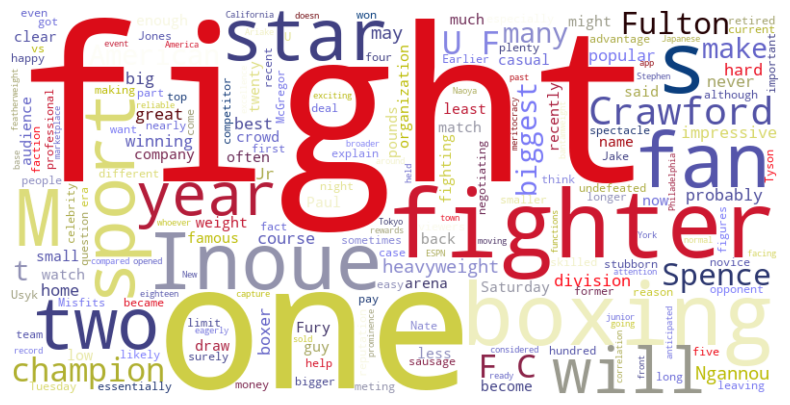

In [176]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap ='gist_stern').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


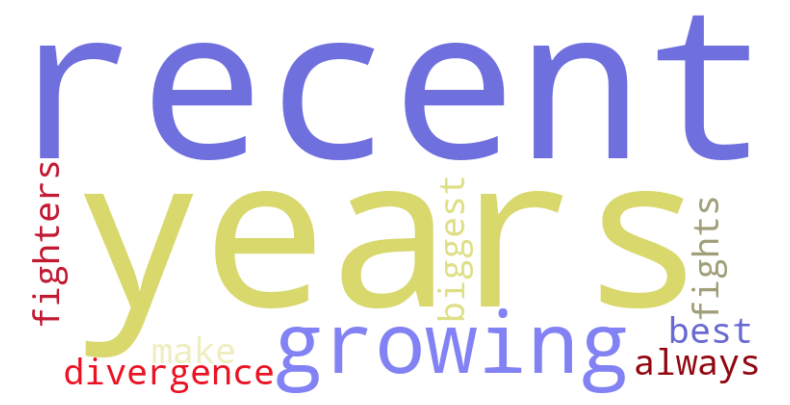

In [175]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap = 'gist_stern').generate(summary)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [138]:
#!pip install textblob

In [139]:
from textblob import TextBlob

In [140]:
# Create a TextBlob object with the text
blob = TextBlob(text)

# Translate the text to Spanish
translated_blob = blob.translate('en', 'it')

# Print the translated text
print(translated_blob)

Martedì scorso, intorno alle 7:30 del mattino a New York, o 4:30 del mattino in California, una piccola ma testarda fazione del pubblico di boxe americano (che è di per sé una fazione piccola ma testarda del pubblico sportivo più ampio) Up the ESPN+ e preparato a guardare uno dei combattimenti più attesi dell'anno: Stephen Fulton, il miglior combattente di Junior Featherweigh si stava spostando dal peso di Bantam, che ha un limite di uno-ettesimo, e che era considerato uno dei combattenti migliori e più eccitanti in qualsiasi divisione di peso. Fulton viene da Filadelfia, ma non ha una base di fan della città di casa, soprattutto rispetto a Inoue, il che spiega perché la lotta si è tenuta di fronte a una folla esaurita all'Ariake Arena, a Tokyo e che aiuta Spiega anche perché l'evento non ha catturato l'attenzione di più fan americani.

Nella maggior parte degli sport, esiste una correlazione affidabile tra eccellenza e prominenza: diventi una star vincendo e vincendo di nuovo. Ma la b

In [141]:
#!pip install -U spacy

In [142]:
#!python -m spacy download en

In [143]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [144]:
# Import the displaCy library
from spacy import displacy

In [145]:
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)

### Customizing Colors and Effects

- You can also pass background color and gradient options:

In [146]:
colors = {'ORG': 'linear-gradient(90deg, fc#7FFFD4, #A52A2A)', 'PRODUCT': 'radial-gradient(yellow, green)'}

options = {'ents': ['ORG', 'PERSON'], 'colors':colors}

displacy.render(doc, style='ent', jupyter=True, options=options)
#aa9c
#fc9ce7

I can see why Naoya Inoue is tagged as an organization since it is a japanese name. Though it is not consistant with names of other people's names even though they are in english. 

### POS

In [147]:
words = word_tokenize(text)

In [148]:
nltk.pos_tag(words)

[('This', 'DT'),
 ('past', 'JJ'),
 ('Tuesday', 'NNP'),
 (',', ','),
 ('at', 'IN'),
 ('around', 'IN'),
 ('7:30', 'CD'),
 ('a.m.', 'RB'),
 ('in', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 (',', ','),
 ('or', 'CC'),
 ('4:30', 'CD'),
 ('a.m.', 'NN'),
 ('in', 'IN'),
 ('California', 'NNP'),
 (',', ','),
 ('a', 'DT'),
 ('small', 'JJ'),
 ('but', 'CC'),
 ('stubborn', 'JJ'),
 ('faction', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('American', 'JJ'),
 ('boxing', 'NN'),
 ('audience', 'NN'),
 ('(', '('),
 ('which', 'WDT'),
 ('is', 'VBZ'),
 (',', ','),
 ('itself', 'PRP'),
 (',', ','),
 ('a', 'DT'),
 ('small', 'JJ'),
 ('but', 'CC'),
 ('stubborn', 'JJ'),
 ('faction', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('broader', 'JJR'),
 ('sports', 'NNS'),
 ('audience', 'NN'),
 (')', ')'),
 ('opened', 'VBD'),
 ('up', 'RP'),
 ('the', 'DT'),
 ('ESPN+', 'NNP'),
 ('app', 'NN'),
 ('and', 'CC'),
 ('got', 'VBD'),
 ('ready', 'JJ'),
 ('to', 'TO'),
 ('watch', 'VB'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('year', 'NN

In [149]:
#How many words are there? :
print (len(words))

1899


In [150]:
#Import required libraries :
from nltk.probability import FreqDist

In [151]:
#Find the frequency :
fdist = FreqDist(words)

In [152]:
#Print 10 most common words :
fdist.most_common(10)

[(',', 158),
 ('the', 85),
 ('.', 56),
 ('a', 55),
 ('of', 46),
 ('and', 32),
 ('to', 31),
 ('in', 28),
 ('is', 21),
 ('’', 18)]

In [153]:
#Plot the graph for fdist :
import matplotlib.pyplot as plt
%matplotlib inline

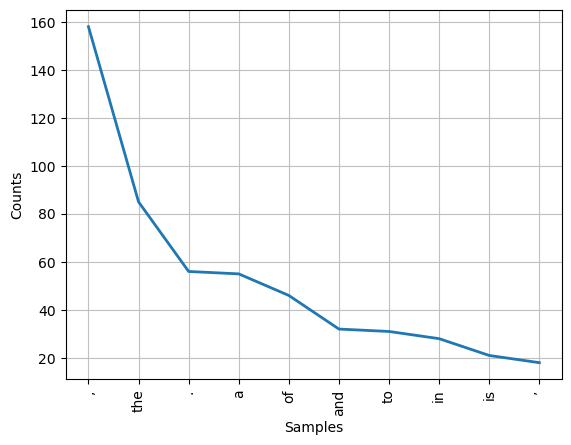

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [154]:
fdist.plot(10)

In [155]:
words_no_punc = []

In [156]:
for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())

In [157]:
print(words_no_punc)

['this', 'past', 'tuesday', 'at', 'around', 'in', 'new', 'york', 'or', 'in', 'california', 'a', 'small', 'but', 'stubborn', 'faction', 'of', 'the', 'american', 'boxing', 'audience', 'which', 'is', 'itself', 'a', 'small', 'but', 'stubborn', 'faction', 'of', 'the', 'broader', 'sports', 'audience', 'opened', 'up', 'the', 'app', 'and', 'got', 'ready', 'to', 'watch', 'one', 'of', 'the', 'year', 's', 'most', 'eagerly', 'anticipated', 'fights', 'stephen', 'fulton', 'the', 'top', 'fighter', 'at', 'junior', 'featherweight', 'which', 'has', 'a', 'limit', 'of', 'a', 'hundred', 'and', 'pounds', 'was', 'facing', 'naoya', 'inoue', 'a', 'japanese', 'star', 'who', 'was', 'moving', 'up', 'from', 'bantamweight', 'which', 'has', 'a', 'limit', 'of', 'and', 'who', 'was', 'considered', 'one', 'of', 'the', 'best', 'and', 'most', 'exciting', 'fighters', 'in', 'any', 'weight', 'division', 'fulton', 'comes', 'from', 'philadelphia', 'but', 'he', 'doesn', 't', 'have', 'much', 'of', 'a', 'fan', 'base', 'especially

In [158]:
len(words_no_punc)

1563

In [159]:
fdist = FreqDist(words_no_punc)

In [160]:
fdist.most_common(10)

[('the', 87),
 ('a', 55),
 ('of', 46),
 ('and', 35),
 ('in', 34),
 ('to', 31),
 ('is', 21),
 ('but', 20),
 ('who', 17),
 ('fight', 17)]

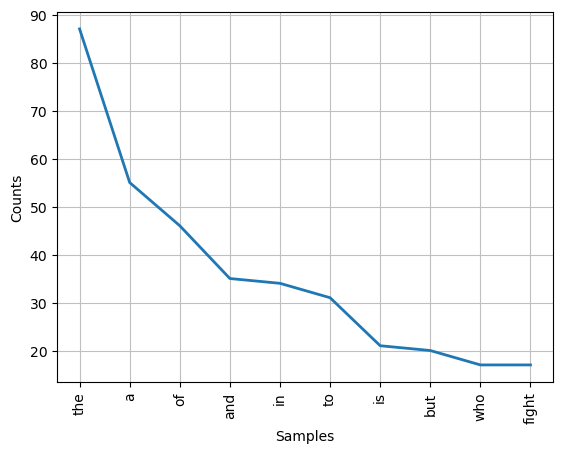

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [161]:
fdist.plot(10)

A lot of stop words lets get rid of them.

In [ ]:
clean_words = []

In [ ]:
for w in words_no_punc:
    if w not in stopwords:
        clean_words.append(w)

In [ ]:
fdist = FreqDist(clean_words)

In [163]:
fdist.most_common(10)

[('the', 87),
 ('a', 55),
 ('of', 46),
 ('and', 35),
 ('in', 34),
 ('to', 31),
 ('is', 21),
 ('but', 20),
 ('who', 17),
 ('fight', 17)]

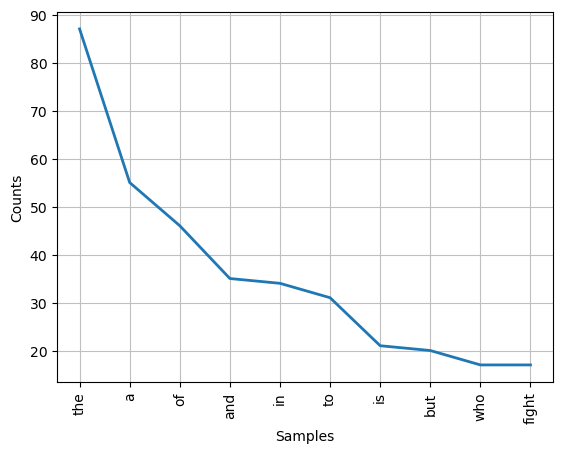

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [164]:
fdist.plot(10)

Now that we have the clean words we can see what the author of the aritcle refernced more. He mentioned Inoue way more than Fulton granted Inoue did win the fight but the article was about how the best fighters dont draw crowds.